#### Práctica - Proyecto: Área de Marketing


Para cada uno de los clientes registrados tengo la cantidad de mails enviados, cantidad de mails rebotados, cantidad de aperturas de esos mails, cantidad de clicks. La hora promedio de las interacciones antes mencionadas. La variable comprador es binaria y se desconoce si hace referencia al registro total o al último año del usuario (esto varía a nivel interno).


- Id:	Identificador único de campaña, usuario o interacción
- send:	Número de correos enviados
- bounce:	Correos que rebotaron (no llegaron al destinatario)
- open: Cantidad de aperturas del correo
- click: Cantidad de clics en enlaces dentro del correo
- Total: Suma de interacciones (send + open + click, etc.)
- Comprador: Indicador binario (1 = realizó compra, 0 = no)
- hour:	Hora promedio de envío o apertura (valor continuo, puede ser decimal)
- day_of_week: Día de la semana promedio (por ejemplo, 3.5 = mitad de miércoles y jueves)

#### Análisis del Dataset

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
df = pd.read_excel("https://raw.githubusercontent.com/GabiMiranda05/Practice-Data-Science/main/Clustering-Segmentaci%C3%B3n/mailing_dataset.xlsx")

In [107]:
df.head(5)

,Id,send,bounce,open,click,Total,Comprador,hour,day_of_week
0,2044163,4,0,0,0,4,0,17.000000,3.500000
1,633731,1,0,0,0,1,0,21.000000,4.000000
2,1537126,4,0,0,0,4,0,17.000000,3.500000
3,1960135,3,0,0,0,3,0,15.333333,3.333333
4,1004992,8,0,1,0,10,1,18.222222,2.000000


Para validar la integridad de los datos, se valida que la columna total es el resultado de la suma de las anteriores. En este caso las columnas send, bounce, click sumadas deben ser el registro de la columna "Total".

In [108]:
df["Total"] = df["send"] + df["bounce"] + df["open"] + df["click"]

In [109]:
df.head(5)

,Id,send,bounce,open,click,Total,Comprador,hour,day_of_week
0,2044163,4,0,0,0,4,0,17.000000,3.500000
1,633731,1,0,0,0,1,0,21.000000,4.000000
2,1537126,4,0,0,0,4,0,17.000000,3.500000
3,1960135,3,0,0,0,3,0,15.333333,3.333333
4,1004992,8,0,1,0,9,1,18.222222,2.000000


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212292 entries, 0 to 212291
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Id           212292 non-null  int64  
 1   send         212292 non-null  int64  
 2   bounce       212292 non-null  int64  
 3   open         212292 non-null  int64  
 4   click        212292 non-null  int64  
 5   Total        212292 non-null  int64  
 6   Comprador    212292 non-null  int64  
 7   hour         212292 non-null  float64
 8   day_of_week  212292 non-null  float64
dtypes: float64(2), int64(7)
memory usage: 14.6 MB


In [111]:
df.describe()

,Id,send,bounce,open,click,Total,Comprador,hour,day_of_week
count,2.122920e+05,212292.000000,212292.000000,212292.000000,212292.000000,212292.000000,212292.000000,212292.000000,212292.000000
mean,1.062074e+06,3.757801,0.264273,0.483819,0.072108,4.578001,0.616542,18.506052,2.467164
std,6.119871e+05,3.838834,0.665326,1.564734,0.607759,4.697690,0.486229,3.078170,1.208796
min,0.000000e+00,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,5.336052e+05,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,17.000000,1.500000
50%,1.062491e+06,2.000000,0.000000,0.000000,0.000000,3.000000,1.000000,19.600000,2.333333
75%,1.592284e+06,5.000000,0.000000,0.000000,0.000000,6.000000,1.000000,20.666667,3.500000
max,2.122907e+06,167.000000,55.000000,174.000000,106.000000,291.000000,1.000000,23.000000,6.000000


Se observa que por lo menos un email se envió al total de los clientes registrados (valor mínimo) como valor máximo se tiene 167 mails enviados. Observando los cuartiles se intuye la existencia de valores atípicos.

¿Estas son las mejores variables para crear el modelo?

El ajuste de hiperparámetros en los modelos pueden aumentar el rendimiento pero tienen un límitie, en un máximo de 3 a 4 % pero la creación de nuevas variables pueden hacer la diferencia para llegar a un modelo óptimo.


**CREACIÓN DE VARIABLES**

Se crean nuevas variables que dependen de los emails enviados. En este caso tanto bounce open y click dependen de send. Si una persona abre un mail no es lo mismo si es después de haberle enviado 1 solo mail que de enviarle 10.

In [112]:
df["bounce_percentage"] = (df["bounce"] / df["send"])*100
df["open_percentage"] = (df["open"] / df["send"])*100
df["click_percentage"] = (df["click"] / df["send"])*100

In [113]:
df.head()

,Id,send,bounce,open,click,Total,Comprador,hour,day_of_week,bounce_percentage,open_percentage,click_percentage
0,2044163,4,0,0,0,4,0,17.000000,3.500000,0.0,0.0,0.0
1,633731,1,0,0,0,1,0,21.000000,4.000000,0.0,0.0,0.0
2,1537126,4,0,0,0,4,0,17.000000,3.500000,0.0,0.0,0.0
3,1960135,3,0,0,0,3,0,15.333333,3.333333,0.0,0.0,0.0
4,1004992,8,0,1,0,9,1,18.222222,2.000000,0.0,12.5,0.0


In [114]:
df.describe()

,Id,send,bounce,open,click,Total,Comprador,hour,day_of_week,bounce_percentage,open_percentage,click_percentage
count,2.122920e+05,212292.000000,212292.000000,212292.000000,212292.000000,212292.000000,212292.000000,212292.000000,212292.000000,212292.000000,212292.000000,212292.000000
mean,1.062074e+06,3.757801,0.264273,0.483819,0.072108,4.578001,0.616542,18.506052,2.467164,19.060591,15.022417,2.452034
std,6.119871e+05,3.838834,0.665326,1.564734,0.607759,4.697690,0.486229,3.078170,1.208796,38.936093,45.351927,27.883564
min,0.000000e+00,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.336052e+05,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,17.000000,1.500000,0.000000,0.000000,0.000000
50%,1.062491e+06,2.000000,0.000000,0.000000,0.000000,3.000000,1.000000,19.600000,2.333333,0.000000,0.000000,0.000000
75%,1.592284e+06,5.000000,0.000000,0.000000,0.000000,6.000000,1.000000,20.666667,3.500000,0.000000,0.000000,0.000000
max,2.122907e+06,167.000000,55.000000,174.000000,106.000000,291.000000,1.000000,23.000000,6.000000,300.000000,4033.333333,7300.000000


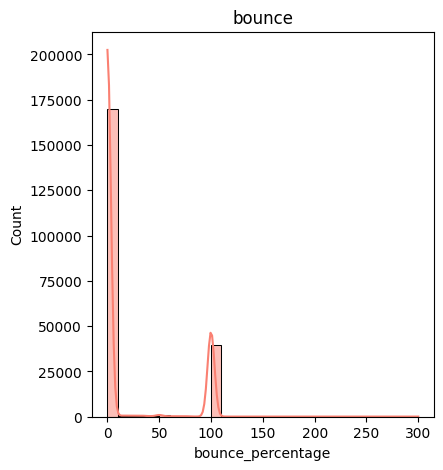

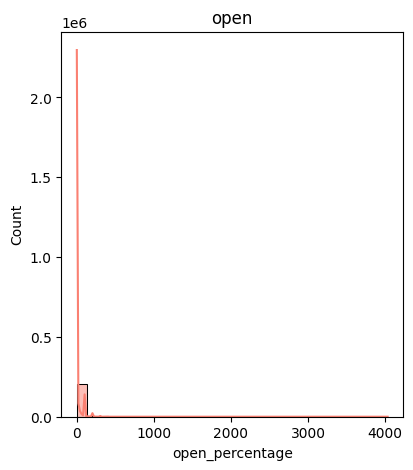

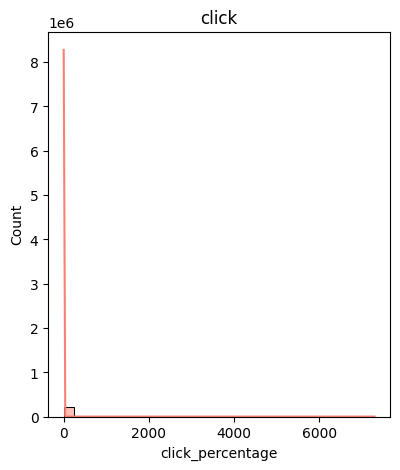

In [115]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.histplot(df["bounce_percentage"], bins=30, kde=True, color="salmon")
plt.title("bounce")

plt.figure(figsize=(15,5))
plt.subplot(1,3,2)
sns.histplot(df["open_percentage"], bins=30, kde=True, color="salmon")
plt.title("open")

plt.figure(figsize=(15,5))
plt.subplot(1,3,3)
sns.histplot(df["click_percentage"], bins=30, kde=True, color="salmon")
plt.title("click")

plt.show()

- En el primer gráfico se observa una distribución bimodal, donde dos valores se repiten en gran cantidad. En este caso, es asimétrica derecha, los valores mas repetidos se encuentran entre 0 y 100. Se puede discretizar la variable continua, por ejemplo, asignarle valor 0 a 1 si rebotaron o no rebotaron los correos (bounce). En el caso de los valores 300 (outliers) puede deberse a un error de integridad de los datos, que pueden asignarse como "-1".
- En el segundo gráfico se observa una distribución asimétrica a la derecha, casi nadie abre los emails.
- En el tercer gráfico se observa el mismo comportamiento que el anterior donde tampoco existen demasiados clicks.

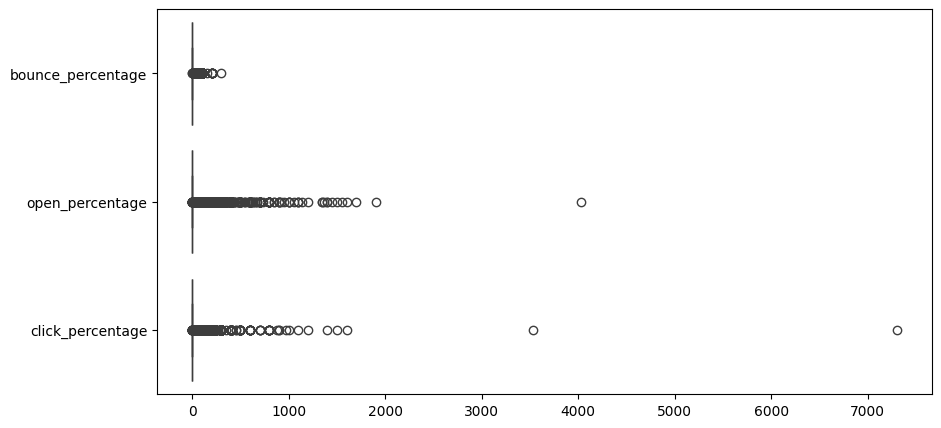

In [116]:
plt.figure(figsize=(10,5))
sns.boxplot(df[["bounce_percentage", "open_percentage","click_percentage"]], orient="h")
plt.show()

En el gráfico se observa gran cantidad de valores atípicos. Como se va a trabajar con un modelo de Clustering, donde se utilizará el KNN (modelo que trabaja con distancias). Es decir, se va a ver fuertemente influenciada por la presencia de valores atípicos.
Se deben revisar los valores extremos atípicos como en este caso lo son los registros mas 3000 % de clicks, lo mismo con las otras variables. Se revisa tanto la integridad de los registros para ver si son validos o no.

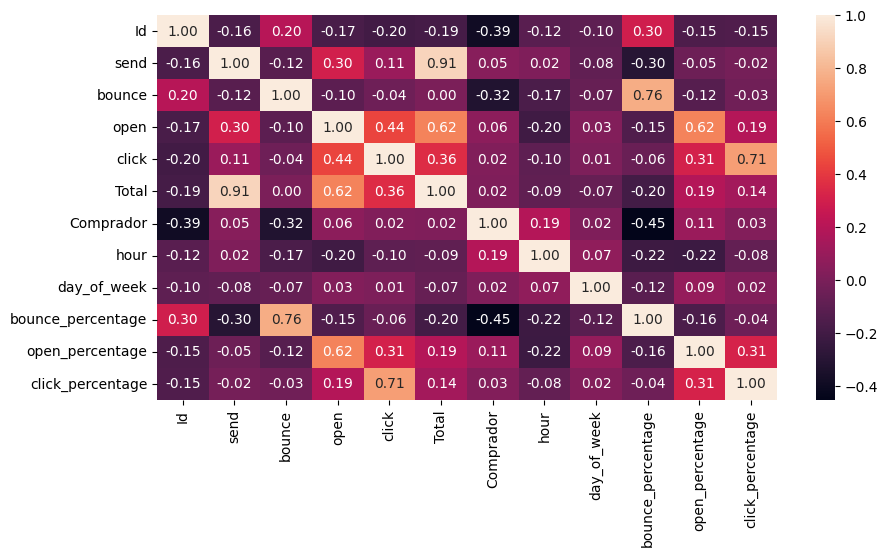

In [117]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

En la matriz de correlación se observa como valor notable el 0.91 lo que indica que la composición de "total" viene dada en gran medida por la variable "send". No sería ideal incluir ambas variables al modelo debido a su alta correlación. Se evita replicar el mismo dato, eliminando el feature del dataset. Por otro lado, se descartan las variables brounc, open y click al estar incluidos en las nuevas variable.
Además, se debe interpretar los coeficientes de variables continuas en esta matriz ya que en variables discretas la información no es del todo válida.

In [118]:
df.shape

(212292, 12)

Con una compu de 16 GB de RAM tardaría mucho entrenar el modelo de 200.000 registros.

#### Muestra de datos

Se toma una muestra que sea la mas representativa posible de la población total (Estadísticamente representativa). Esta debería entregar resultados similares.
¿De que tamaño debería ser la muestra? en casos como las encuestas para intención de voto con 3.000 personas de 30.000.000 puede ser representativa.

In [119]:
from scipy.stats import ks_2samp

In [120]:
muestra_1 = df.sample(frac=0.1, random_state=1)

Se toma un 10% de mis datos de forma aleatoria frac=0.1. ¿Cómo saber si los datos son representativos de la población?

In [121]:
columnas_numericas_datos = df.select_dtypes(include="number").columns

In [122]:
columnas_numericas_muestra = muestra_1.select_dtypes(include="number").columns

Se iteran cada para de columna. Con esto se obtiene las distribuciones y se debe observar si se asemejan o no.

In [123]:
for columna_datos, columna_muestra in zip(columnas_numericas_datos,columnas_numericas_muestra):
    statistic, p_value = ks_2samp(df[columna_datos], muestra_1[columna_muestra])
    print(f"columna:{columna_datos}")
    print(f"estadistico:{statistic}")
    print(f"p_valor:{p_value}")
    print("------------------------")

columna:Id
estadistico:0.004501687712716751
p_valor:0.8272670918979919
------------------------
columna:send
estadistico:0.003643199070394343
p_valor:0.9590765966800802
------------------------
columna:bounce
estadistico:0.0007911964227053092
p_valor:1.0
------------------------
columna:open
estadistico:0.001252500787226274
p_valor:1.0
------------------------
columna:click
estadistico:0.0015823906265152177
p_valor:0.9999999998781921
------------------------
columna:Total
estadistico:0.004689056345731246
p_valor:0.7879711080853807
------------------------
columna:Comprador
estadistico:0.0010091529729110982
p_valor:1.0
------------------------
columna:hour
estadistico:0.005789533950811665
p_valor:0.5352470807692755
------------------------
columna:day_of_week
estadistico:0.004809561893503678
p_valor:0.76147292228535
------------------------
columna:bounce_percentage
estadistico:0.0010192425122910187
p_valor:1.0
------------------------
columna:open_percentage
estadistico:0.0031952839646

Se busca que el p_valor este por encima 0,05, esto demuestra que el nivel de significancia es habitual (alpha). (TEST DE HIPÓTESIS) Esta hipótesis no dice que si el valor de p_valor es > 0,05 la distribución de la poblacion es la misma que de la muestra, si no que dice que no tengo evidencia para refutar la afirmación contraria. Si fuera p_valor < 0,05 entonces si puedo decir que la muestra no sigue la distribución original.

- statistic: el mayor valor absoluto entre las diferencias acumuladas de las distribuciones.

- p_value: la probabilidad de obtener un valor tan extremo como el observado si ambas muestras provinieran de la misma distribución (es decir, si la hipótesis nula es cierta).

Interpretación del resultado:

- Hipótesis nula (H₀): las dos muestras tienen la misma distribución.

- Hipótesis alternativa (H₁): las muestras tienen distribuciones diferentes.

- Si p_value > 0.05 → No se rechaza H₀ → Las distribuciones son similares.

- Si p_value ≤ 0.05 → Se rechaza H₀ → Las distribuciones son diferentes.

#### Entrenamiento

In [124]:
from sklearn.cluster import KMeans

Como trabajamos con distancias en el modelo Kmeans necesitamos escalar variables pudiendo utilizar el StandardScaler y MinMaxScaler

In [125]:
from sklearn.preprocessing import StandardScaler

In [126]:
from sklearn.metrics import silhouette_score

In [127]:
#Lista de atributos
features = ["Total","bounce_percentage","open_percentage","click_percentage","Comprador","hour","day_of_week"]

In [128]:
muestra_1[features]

,Total,bounce_percentage,open_percentage,click_percentage,Comprador,hour,day_of_week
198001,2,0.0,0.0,0.0,1,20.000000,1.500
94869,2,0.0,0.0,0.0,1,20.000000,1.500
197072,3,0.0,0.0,0.0,1,19.333333,1.000
148589,1,0.0,0.0,0.0,1,20.000000,4.000
209170,2,100.0,0.0,0.0,0,23.000000,2.000
...,...,...,...,...,...,...,...
66458,5,0.0,150.0,0.0,1,14.400000,0.800
3270,1,0.0,0.0,0.0,1,21.000000,0.000
84499,8,100.0,0.0,0.0,0,17.000000,3.500
157940,2,0.0,0.0,0.0,1,20.000000,1.500


Se escalan las variables, entonces se entrena el Scaler. Se inicializa el objeto y después se entrena.

In [129]:
scaler = StandardScaler()

In [130]:
df_processed = scaler.fit_transform(muestra_1[features])

In [131]:
df_processed # para entrenar mi modelo

array([[-0.56347933, -0.49022198, -0.34860436, ...,  0.78695505,
         0.47939139, -0.80117177],
       [-0.56347933, -0.49022198, -0.34860436, ...,  0.78695505,
         0.47939139, -0.80117177],
       [-0.34156851, -0.49022198, -0.34860436, ...,  0.78695505,
         0.26098698, -1.21300903],
       ...,
       [ 0.76798558,  2.07455102, -0.34860436, ..., -1.27072061,
        -0.50342845,  0.84617723],
       [-0.56347933, -0.49022198, -0.34860436, ...,  0.78695505,
         0.47939139, -0.80117177],
       [ 0.76798558, -0.49022198,  1.05838472, ...,  0.78695505,
         0.31558809,  0.33138067]])

Obtengo un array para poder usarlo para etrenar el modelo.

Para saber la cantidad óptima de cluster se itera con la siguiente función.

In [132]:
def fit_kmeans_and_score(k,data):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertia_val = kmeans.inertia_
    silhouette_val = silhouette_score(data, kmeans.labels_) if k > 1 else None
    return inertia_val,silhouette_val

In [133]:
k_values = range(2,9)

In [134]:
inertia = []
silhouette_scores = []

Para ver cuanto tarda uso %%time

In [135]:
%%time
for k in k_values:
    inertia_val,silhouette_val = fit_kmeans_and_score(k, df_processed)
    inertia.append(inertia_val)
    silhouette_scores.append(silhouette_val)

CPU times: user 39.7 s, sys: 12.9 s, total: 52.5 s
Wall time: 40.4 s


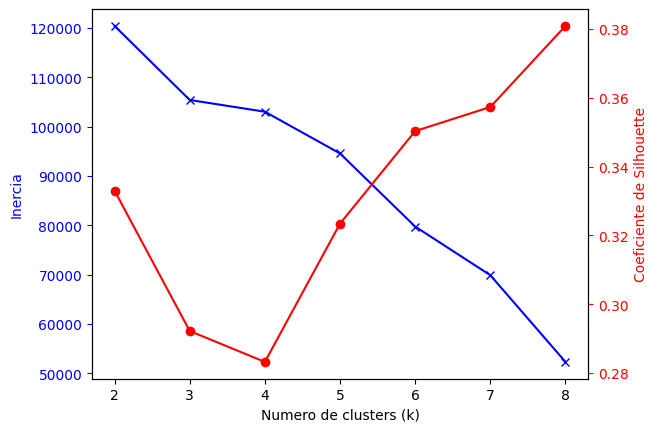

In [136]:
fig, ax1 = plt.subplots()

ax1.plot(k_values, inertia, "bx-", label="Inercia")
ax1.set_xlabel("Numero de clusters (k)")
ax1.set_ylabel("Inercia", color="b")
ax1.tick_params("y", colors="b")

ax2 = ax1.twinx()
ax2.plot(k_values, silhouette_scores, "ro-", label="Coeficiente de Silhouette")
ax2.set_ylabel("Coeficiente de Silhouette", color="r")
ax2.tick_params("y", colors="r")

plt.show()

Para cada valor de K se tiene el valor de método del codo y en rojo el coeficiente de Sillhouette.

In [137]:
kmeans_5 = KMeans(n_clusters=5, random_state=42).fit(df_processed)

In [138]:
kmeans_6 = KMeans(n_clusters=6, random_state=42).fit(df_processed)

In [139]:
cluster_labels_5 = kmeans_5.predict(df_processed)

In [140]:
cluster_labels_6 = kmeans_6.predict(df_processed)

Se predice una etiqueta para cada valor, es decir, que cada cliente pertenecerá a uno de los 5 clusters.

In [141]:
cluster_labels_5

array([2, 2, 2, ..., 3, 2, 2], dtype=int32)

In [142]:
cluster_labels_6

array([2, 2, 2, ..., 3, 2, 2], dtype=int32)

In [143]:
muestra_1["cluster_5"] = cluster_labels_5

In [144]:
muestra_1["cluster_6"] = cluster_labels_6

In [145]:
muestra_1.head(5)

,Id,send,bounce,open,click,Total,Comprador,hour,day_of_week,bounce_percentage,open_percentage,click_percentage,cluster_5,cluster_6
198001,628289,2,0,0,0,2,1,20.000000,1.5,0.0,0.0,0.0,2,2
94869,588588,2,0,0,0,2,1,20.000000,1.5,0.0,0.0,0.0,2,2
197072,1814229,3,0,0,0,3,1,19.333333,1.0,0.0,0.0,0.0,2,2
148589,521538,1,0,0,0,1,1,20.000000,4.0,0.0,0.0,0.0,2,2
209170,1142169,1,1,0,0,2,0,23.000000,2.0,100.0,0.0,0.0,3,3


#### Caracterización

Para catacterizar cada cluster se debe considerar solo los features utilizados para entrenar el modelo. Al obtener cada registro con el cluster correspondiente se debe describir cada una de las segmentaciones. Para esto se puede hacer un pequeño EDA.

In [146]:
features.append("cluster_5")

In [147]:
muestra_1_filtrado = muestra_1.filter(features)

In [148]:
muestra_1_filtrado

,Total,bounce_percentage,open_percentage,click_percentage,Comprador,hour,day_of_week,cluster_5
198001,2,0.0,0.0,0.0,1,20.000000,1.500,2
94869,2,0.0,0.0,0.0,1,20.000000,1.500,2
197072,3,0.0,0.0,0.0,1,19.333333,1.000,2
148589,1,0.0,0.0,0.0,1,20.000000,4.000,2
209170,2,100.0,0.0,0.0,0,23.000000,2.000,3
...,...,...,...,...,...,...,...,...
66458,5,0.0,150.0,0.0,1,14.400000,0.800,2
3270,1,0.0,0.0,0.0,1,21.000000,0.000,2
84499,8,100.0,0.0,0.0,0,17.000000,3.500,3
157940,2,0.0,0.0,0.0,1,20.000000,1.500,2


In [149]:
promedios_por_cluster = muestra_1_filtrado.groupby("cluster_5").mean()
promedios_por_cluster

,Total,bounce_percentage,open_percentage,click_percentage,Comprador,hour,day_of_week
cluster_5,,,,,,,
0,3.355172,95.111590,0.215517,0.000000,1.000000,19.408642,2.444147
1,5.918553,0.413708,14.364859,2.144326,0.003385,18.487383,2.646908
2,4.649766,0.257939,19.754777,3.106232,1.000000,19.040863,2.495371
3,2.648292,99.641359,0.020543,0.000000,0.000000,21.418972,2.872819
4,2.347049,96.990873,1.326475,0.694820,0.058473,12.398064,1.521749


In [ ]:
"""
cluster:

0 -> BOUNCERS BUYERS
1 -> OPENERS/CLICKERS NO BUYERS
2 -> OPENERS/CLICKERS BUYERS
3 -> BOUNCERS NO BUYERS
4 -> BOUNCERS QUE CLICKEAN ALGO... A LAS 12 UN LUNES

"""

- Todos los clientes del cluster 0 tuvieron en promedio 3,35 interacciones. El 95% fueron rebotados. Se clasifican como BOUNCERS. Además, el promedio de compra es de 1, por lo que además de tener mail rebotados si compran. BOUNCERS BUYERS.
- El cluster 3 y 4, si seguimos el mismo lineamiento serían Bouncers. Con la diferencia de que el cluster 4 tienen mayor porcentaje de clicks (MUY LEVE AUMENTO). La hora promedio de este cluster es las dos 12.

Una caracterización más útil sería tener los que rebotan todos juntos, por otro lado, los que abran y clickean como otro gran grupo. En el medio caracterizar los compradores.

In [150]:
promedios_por_cluster = muestra_1_filtrado.groupby("cluster_5").count()
promedios_por_cluster

,Total,bounce_percentage,open_percentage,click_percentage,Comprador,hour,day_of_week
cluster_5,,,,,,,
0,580,580,580,580,580,580,580
1,4727,4727,4727,4727,4727,4727,4727
2,12406,12406,12406,12406,12406,12406,12406
3,1669,1669,1669,1669,1669,1669,1669
4,1847,1847,1847,1847,1847,1847,1847


In [158]:
features.append("cluster_6")

In [159]:
muestra_1_filtrado = muestra_1.filter(features)

In [165]:
muestra_1_filtrado = muestra_1_filtrado.drop("cluster_5", axis=1)

In [166]:
promedios_por_cluster = muestra_1_filtrado.groupby("cluster_6").mean()
promedios_por_cluster

,Total,bounce_percentage,open_percentage,click_percentage,Comprador,hour,day_of_week
cluster_6,,,,,,,
0,3.408547,94.757360,0.367521,0.000000,1.000000,19.386500,2.443433
1,5.442918,0.444454,7.019987,0.525763,0.000000,18.727843,2.624690
2,4.154381,0.228237,7.489890,0.416947,1.000000,19.510927,2.455431
3,2.648082,99.671120,0.020555,0.000000,0.000000,21.420022,2.873543
4,2.331691,98.052623,0.218938,0.000000,0.056377,12.462205,1.513395
5,9.037493,0.263488,113.020484,24.100213,0.839955,15.348610,2.816488


In [ ]:
"""
cluster:

0 -> BOUNCERS BUYERS
1 -> NO BUYERS
2 -> BUYERS
3 -> BOUNCERS NO BUYERS
4 -> BOUNCERS NO BUYERS
5 -> OPENERS / BURNOUT

"""

El clouster 5 son clientes bombardeados de mails.

In [167]:
promedios_por_cluster = muestra_1_filtrado.groupby("cluster_6").count()
promedios_por_cluster

,Total,bounce_percentage,open_percentage,click_percentage,Comprador,hour,day_of_week
cluster_6,,,,,,,
0,585,585,585,585,585,585,585
1,4441,4441,4441,4441,4441,4441,4441
2,10921,10921,10921,10921,10921,10921,10921
3,1668,1668,1668,1668,1668,1668,1668
4,1827,1827,1827,1827,1827,1827,1827
5,1787,1787,1787,1787,1787,1787,1787
